In [1]:
import sys
from os.path import exists
import gzip
import logging
import time
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
sys.path.append("../../")
#pd.set_option('display.precision', 3)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline
#from discovery_bu_multidim import bu_discovery_multidim
from sample_multidim import MultidimSample

In [2]:
#Logger Configuration:
LOG_FORMAT = '%(asctime)s - %(name)s - %(levelname)s - %(message)s'
LOGGER = logging.getLogger(__name__)
LOGGER.setLevel('INFO')
FILE_HANDLER = logging.StreamHandler()
FORMATTER = logging.Formatter(LOG_FORMAT)
FILE_HANDLER.setFormatter(FORMATTER)
LOGGER.addHandler(FILE_HANDLER)

### Traces by Date

In [3]:
LOGGER.info('Started reading file')
file = open('finance_traces_by_date.txt', 'r')
counter = 0
start= time.time()
sample_sets = []
for trace1 in file:
    counter+=1
    sample_sets.append(trace1)


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 1: %i lines in %f seconds', counter, result)

2023-01-25 17:29:04,664 - __main__ - INFO - Started reading file
2023-01-25 17:29:04,672 - __main__ - INFO - Finished reading file 1: 96 lines in 0.005574 seconds


In [4]:
trace_length_dict=[]
for trace in sample_sets:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 1: %f', sum(trace_length_dict)/len(trace_length_dict))

2023-01-25 17:29:05,968 - __main__ - INFO - Average Trace length of sample 1: 1230.666667


In [5]:
att_typeset = {key: {} for key in range(6)}
dim_sets = {key: set() for key in range(6)}
dom_trace_dict = {key: {} for key in range(6)}
for trace_id, trace in enumerate(sample_sets):
    # if trace_id in df1.index:
    # print(trace_id)
    dim_sets_new = {key: set() for key in range(6)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]



In [6]:
df1_dict = pd.DataFrame(dom_trace_dict[5].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
# df1_dict2.to_csv('query2_status.csv')

df1_dict2.describe()

100   1000  10000  10001  100034  100035  10004  100065  10008  \
count  96.000 96.000 52.000  1.000   1.000   1.000  2.000   1.000  1.000   
mean  107.000 22.365  1.615  1.000   1.000   1.000  1.000   1.000  1.000   
std    43.918  9.399  0.820    NaN     NaN     NaN  0.000     NaN    NaN   
min     6.000  2.000  1.000  1.000   1.000   1.000  1.000   1.000  1.000   
25%    94.500 18.750  1.000  1.000   1.000   1.000  1.000   1.000  1.000   
50%   120.500 25.000  1.000  1.000   1.000   1.000  1.000   1.000  1.000   
75%   135.000 28.000  2.000  1.000   1.000   1.000  1.000   1.000  1.000   
max   181.000 44.000  4.000  1.000   1.000   1.000  1.000   1.000  1.000   

       10009  ...  9995  9996  99967  9997  99971  99976  99978  9998  99987  \
count  3.000  ... 2.000 2.000  1.000 1.000  1.000  1.000  1.000 2.000  1.000   
mean   1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   
std    0.000  ... 0.000 0.000    NaN   NaN    NaN    NaN    NaN 0.000    NaN   
min    1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   
25%    1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   
50%    1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   
75%    1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   
max    1.000  ... 1.000 1.000  1.000 1.000  1.000  1.000  1.000 1.000  1.000   

       9999  
count 2.000  
mean  1.000  
std   0.000  
min   1.000  
25%   1.000  
50%   1.000  
75%   1.000  
max   1.000  

[8 rows x 25958 columns]

### Traces by ticker

In [21]:
LOGGER.info('Started reading file')
file = open('finance_traces_by_ticker.txt', 'r')
counter = 0
start= time.time()
sample_sets = []
for trace1 in file:
    counter+=1
    sample_sets.append(trace1)


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 2: %i lines in %f seconds', counter, result)

2023-01-25 13:28:58,982 - __main__ - INFO - Started reading file
2023-01-25 13:28:58,999 - __main__ - INFO - Finished reading file 2: 1909 lines in 0.013172 seconds


In [22]:
trace_length_dict=[]
for trace in sample_sets:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 2: %f', sum(trace_length_dict)/len(trace_length_dict))

2023-01-25 13:29:00,472 - __main__ - INFO - Average Trace length of sample 2: 62.837611


In [23]:
len(sample_sets)

1909

In [24]:

att_typeset = {key: {} for key in range(6)}
dim_sets = {key: set() for key in range(6)}
dom_trace_dict = {key: {} for key in range(6)}
for trace_id, trace in enumerate(sample_sets):
    #print(trace_id)
    dim_sets_new = {key: set() for key in range(6)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]

KeyError: 5

In [25]:
df1_dict = pd.DataFrame(dom_trace_dict[2].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
# df1_dict2.to_csv('query2_status.csv')

df1_dict2.describe()

314.84
count   1.000
mean    1.000
std       NaN
min     1.000
25%     1.000
50%     1.000
75%     1.000
max     1.000

#### Dimension 4: Type or Status

In [11]:

df1_dict = pd.DataFrame(dom_trace_dict[2].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query2_status.csv')

df1_dict2.describe()

0       1       2       3       4       5      8
count 240.000 198.000 192.000 239.000 240.000 212.000  5.000
mean  247.775 291.025  23.203 154.874 282.146  65.717  6.800
std   171.552 214.646  32.386 194.577 259.604  88.113  1.789
min     4.000   1.000   1.000   1.000  12.000   1.000  6.000
25%    95.500 118.250   6.000   8.500  69.750   5.000  6.000
50%   199.500 297.000  11.000  20.000 185.500  34.000  6.000
75%   440.000 435.250  26.250 399.000 418.250  94.250  6.000
max   600.000 966.000 185.000 489.000 911.000 511.000 10.000

### Sample 3

Pattern SEQ(Task a, Task b, Task c)

Where a.machine=b.machine And a.job=c.job

And a.status=1 And b.status=1 And c.status=2

Within 100 seconds

In [13]:
LOGGER.info('Started file 3')
file = gzip.open('google_query3.txt.gz', 'rb')
counter = 0
start= time.time()
sample_sets = []
for trace1 in file:
    counter+=1
    sample_sets.append(' '.join(trace1.decode().split()))


file.close()
result = time.time() - start
LOGGER.info('Finished reading file 3: %i lines in %f seconds', counter, result)

2022-12-05 11:26:16,108 - __main__ - INFO - Started file 3


EOFError: Compressed file ended before the end-of-stream marker was reached

In [14]:
trace_length_dict=[]
for trace in sample_sets:
    trace_length_dict.append(trace.count(' ')+1)
LOGGER.info('Average Trace length of sample 3: %f', sum(trace_length_dict)/len(trace_length_dict))

2022-12-05 11:26:20,636 - __main__ - INFO - Average Trace length of sample 3: 1000.321470


In [16]:

att_typeset = {key: {} for key in range(5)}
dim_sets = {key: set() for key in range(5)}
dom_trace_dict = {key: {} for key in range(5)}
for trace_id, trace in enumerate(sample_sets):
    # print(trace_id)
    dim_sets_new = {key: set() for key in range(5)}
    for dom in dom_trace_dict.keys():
        dom_trace_dict[dom][trace_id]={} 
    for event in trace.split():
        for dom, letter in enumerate(event.split(';')[:-1]):
            if letter in att_typeset[dom]:
                att_typeset[dom][letter].add(trace_id)
            else:
                att_typeset[dom][letter] = set()
                att_typeset[dom][letter].add(trace_id)
                
            if letter in dom_trace_dict[dom][trace_id]:
                dom_trace_dict[dom][trace_id][letter] +=1
            else:
                dom_trace_dict[dom][trace_id][letter] =1
            dim_sets_new[dom].add(letter)
                
    if trace_id != 0:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets[i] & dim_sets_new[i]
            
    else:
        for i in  dim_sets.keys():
            dim_sets[i] = dim_sets_new[i]

#### Dimension 4: Type or Status

In [18]:

df1_dict = pd.DataFrame(dom_trace_dict[3].items())
df1_dict2 = pd.json_normalize(df1_dict[1])
df1_dict2 = df1_dict2.reindex(sorted(df1_dict2.columns), axis=1)
df1_dict2.to_csv('query3_status.csv')

df1_dict2.describe()

0        1      10     11        2        8        9
count 3428.000 2155.000 469.000 17.000 3428.000 1095.000 2084.000
mean   694.474   70.473   2.431  1.941  256.178    3.584    6.381
std    225.579  105.087   0.826  0.899  224.650    8.060    9.785
min      1.000    1.000   1.000  1.000    7.000    1.000    1.000
25%    692.000    1.000   2.000  1.000  170.000    1.000    1.000
50%    795.000    9.000   3.000  2.000  198.000    1.000    2.000
75%    824.000  111.000   3.000  3.000  235.000    4.000    5.000
max    994.000  385.000   5.000  3.000 1000.000  108.000   57.000

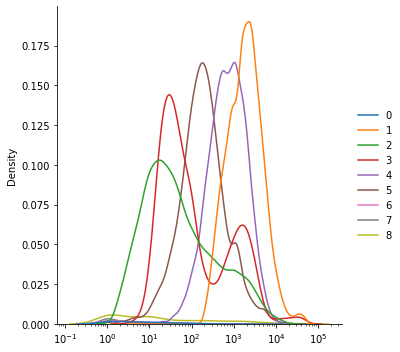

In [64]:
sbn.displot(df1_dict2,  log_scale=True,kind='kde')

In [65]:
df1_dict2.loc[df1_dict2['1'].notna() == False]

0   1  2     3    4       5   6   7   8
5206 NaN NaN  4   436  707   6.000 NaN NaN NaN
6972 NaN NaN  2  2200  361 579.000 NaN NaN NaN